# Decision Tree and Gini index

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

In [14]:
#https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data
cols = ['name','landmass','zone', 'area', 'population', 'language','religion','bars','stripes','colours',
'red','green','blue','gold','white','black','orange','mainhue','circles',
'crosses','saltires','quarters','sunstars','crescent','triangle','icon','animate','text','topleft','botright']
df= pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/flags/flag.data", names = cols)

#variable names to use as predictors
var = ['red', 'green', 'blue','gold', 'white', 'black', 'orange', 'mainhue','bars','stripes', 'circles','crosses', 'saltires','quarters','sunstars','triangle','animate']

#Print number of countries by landmass, or continent
print(df['landmass'].value_counts().sort_index())

1    31
2    17
3    35
4    52
5    39
6    20
Name: landmass, dtype: int64


In [15]:
#Create a new dataframe with only flags from Europe and Oceania
df_36 = df[df['landmass'].isin([3, 6])]

#Print the average values of the predictors for Europe and Oceania
print(df_36.groupby('landmass')[var].mean())

               red  green      blue      gold     white     black    orange  \
landmass                                                                      
3         0.828571    0.2  0.514286  0.428571  0.771429  0.171429  0.057143   
6         0.800000    0.2  0.800000  0.600000  0.950000  0.150000  0.150000   

              bars   stripes   circles   crosses  saltires  quarters  \
landmass                                                               
3         0.628571  1.285714  0.028571  0.285714  0.028571  0.028571   
6         0.000000  0.400000  0.150000  0.400000  0.300000  0.400000   

          sunstars  triangle   animate  
landmass                                
3         0.142857  0.028571  0.114286  
6         3.300000  0.250000  0.300000  


In [16]:
#Create labels for only Europe and Oceania
labels = df_36["landmass"]

#Print the variable types for the predictors
print(df_36[var].dtypes)

red          int64
green        int64
blue         int64
gold         int64
white        int64
black        int64
orange       int64
mainhue     object
bars         int64
stripes      int64
circles      int64
crosses      int64
saltires     int64
quarters     int64
sunstars     int64
triangle     int64
animate      int64
dtype: object


In [17]:
#Create dummy variables for categorical predictors
data = pd.get_dummies(df_36[var])

#Split data into a train and test set
training_data, test_data, training_labels, test_labels = \
    train_test_split(data, labels, random_state=2, test_size=.4)

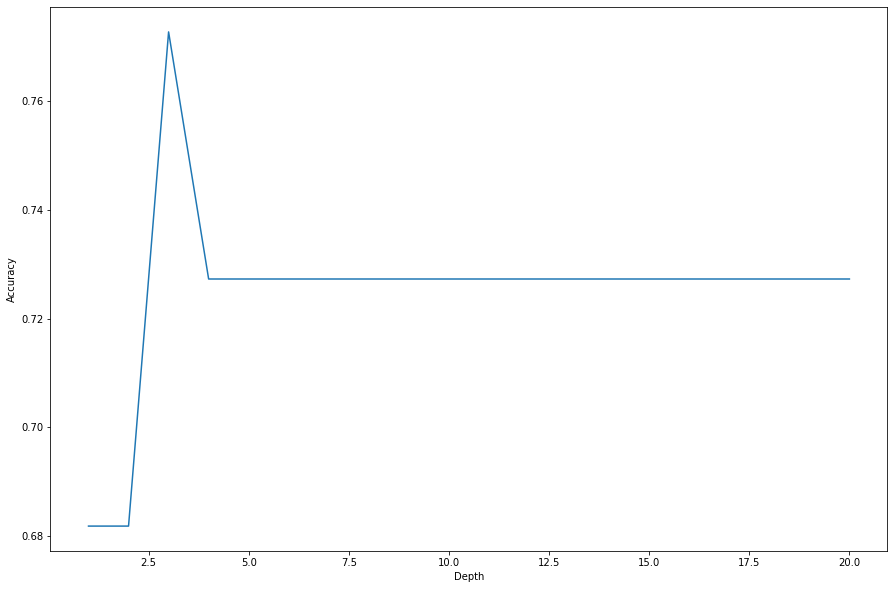

Maximum accuracy:  0.7727272727272727 at depth:  3


In [18]:
#Fit a decision tree for max_depth values 1-20; save the accuracy score in acc_depth
depths = range(1, 21)
acc_depth = []
for depth in depths:
    dtree = DecisionTreeClassifier(max_depth=depth, random_state=2)
    dtree.fit(training_data, training_labels)
    acc_depth.append(dtree.score(test_data, test_labels))

#Plot the accuracy vs depth
plt.plot(depths, acc_depth)
plt.xlabel('Depth')
plt.ylabel('Accuracy')
plt.show()

#Find the largest accuracy and the depth this occurs
max_acc = max(acc_depth)
dep_max = depths[acc_depth.index(max_acc)]
print('Maximum accuracy: ', max_acc, 'at depth: ', dep_max)

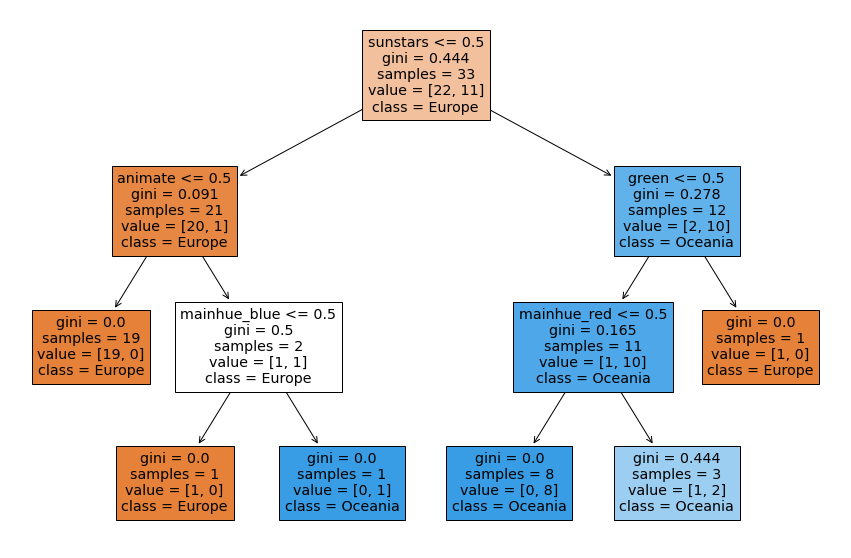

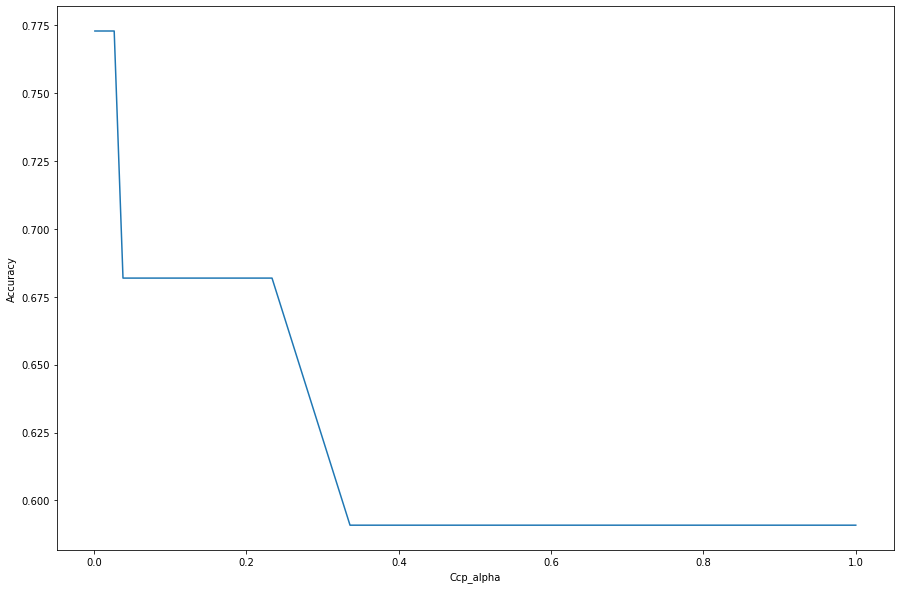

Maximum accuracy:  0.7727272727272727 at ccp:  0.001


In [19]:
#Refit decision tree model with the highest accuracy and plot the decision tree
dtree_1 = DecisionTreeClassifier(random_state=2, max_depth=dep_max)
dtree_1.fit(training_data, training_labels)
tree.plot_tree(dtree_1, feature_names=training_data.columns, class_names=['Europe', 'Oceania'], filled=True)
plt.show()

#Create a new list for the accuracy values of a pruned decision tree. Loop through
#the values of ccp and append the scores to the list
acc_pruned = []
ccp = np.logspace(-3, 0, num=20)
for i in ccp:
    dtree = DecisionTreeClassifier(random_state=2, max_depth=dep_max, ccp_alpha=i)
    dtree.fit(training_data, training_labels)
    acc_pruned.append(dtree.score(test_data, test_labels))

#Plot the accuracy vs ccp_alpha
plt.rcParams['figure.figsize'] = (15, 10)
plt.plot(ccp, acc_pruned)
plt.xlabel('Ccp_alpha')
plt.ylabel('Accuracy')
plt.show()

#Find the largest accuracy and the ccp value this occurs
max_acc_p = max(acc_pruned)
ccp_max = ccp[acc_pruned.index(max_acc_p)]
print('Maximum accuracy: ', max_acc_p, 'at ccp: ', ccp_max)

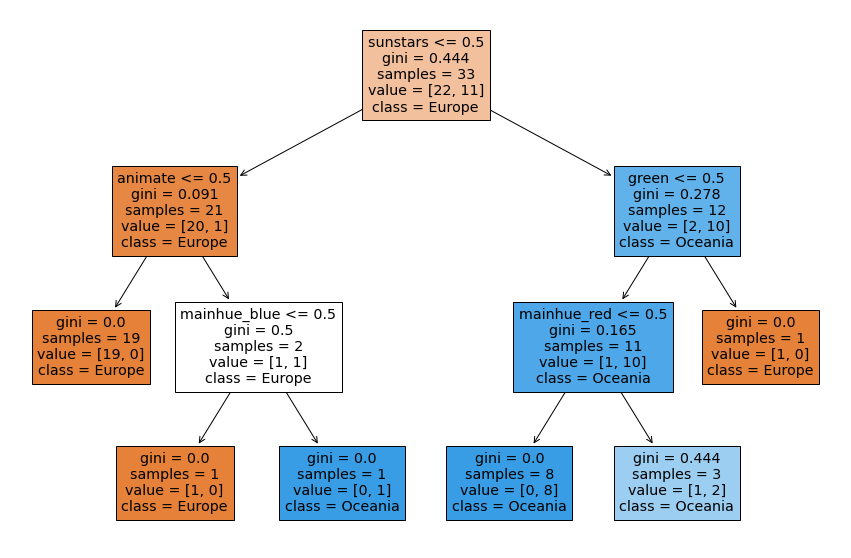

In [20]:
#Fit a decision tree model with the values for max_depth and ccp_alpha found above
dtree_2 = DecisionTreeClassifier(random_state=2, max_depth=3, ccp_alpha=ccp_max)
dtree_2.fit(training_data, training_labels)

#Plot the final decision tree
tree.plot_tree(dtree_2, feature_names=training_data.columns, class_names=['Europe', 'Oceania'], filled=True)
plt.show()